
# Polynomial interpolation

Defination: An interpolation of a given data set by the polynomial of lowest possible degree that passes through the points of the dataset.

This example demonstrates how to approximate a function with a polynomial of degree n by using ${ridge}$ regression. Concretely, from $n_{samples}$ 1d points, it suffices to build the Vandermonde matrix, which is $n_{samples} \times (n_{degree}+1)$ and has the following form:


\begin{bmatrix}
    1 & x_1 & x_1^2 & x_1^3 & \dots & x_1^{n-1} \\
    1 & x_2 & x_2^2 & x_2^3 & \dots & x_2^{n-1} \\
    \dots 
\end{bmatrix}

Intuitively, this matrix can be interpreted as a matrix of pseudo features (the points raised to some power). The matrix is akin to (but different from) the matrix induced by a polynomial kernel.

#### This example shows that you can do non-linear regression with a linear model, using a pipeline to add non-linear features. Kernel methods extend this idea and can induce very high (even infinite) dimensional feature spaces.

A good reference to understand Ridge and Kernel-Ridge is: https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-Ridge.pdf

Automatically created module for IPython interactive environment
RMS 1636.16 Variance score: 0.29
RMS 232.37 Variance score: 0.83
RMS 34.54 Variance score: 0.90


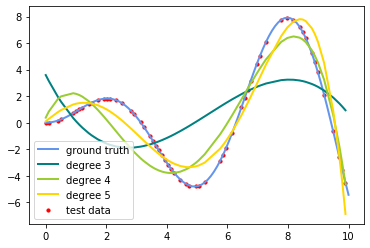

In [2]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause
# Modified: Sadia Khalil (July, 6th, 2019)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate 100 points b/w 0 and 10 (0, 0.1, 0.2, ..., 10.0) as x-coordinates, and get the y-coordinates
x_orig = np.linspace(0, 10, 100)
y_orig = f(x_orig)

# generate points (x,y): first shuffle x and keep a subset of 20 entries and sort them, then generate y
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)

x_train = np.sort(x[:40])
y_train = f(x_train)

x_test = np.sort(x[40:])
y_test = f(x_test)

# create matrix versions (rows to columns) of these arrays
X_train = x_train[:, np.newaxis]
Y_train = y_train[:, np.newaxis]

X_test = x_test[:, np.newaxis]
Y_test = y_test[:, np.newaxis]

X_orig = x_orig[:, np.newaxis]

lw = 2
# plot the original data
plt.plot(x_orig, y_orig, color='cornflowerblue', linewidth=lw, label="ground truth")

# plot the training data
#plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")

# plot the test data
plt.scatter(x_test, y_test, color='red', s=10, marker='o', label="test data")

# set the pallet for the 1st, 2nd and 3rd degrees polynomial functions to be trained by the training data.
colors = ['teal', 'yellowgreen', 'gold']

# train different models, and check the variance w.r.t test data
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    
    # train the model 
    model.fit(X_train, Y_train) # can use y_train as well
    
    # check the model using original data
    '''
    y_pred = model.predict(X_orig)
    plt.plot(x_orig, y_pred, color=colors[count], linewidth=lw, label="degree %d" % degree)
    '''
    # check the model using test data
    y_pred = model.predict(X_test).tolist()
    plt.plot(x_test, y_pred, color=colors[count], linewidth=lw, label="degree %d" % degree)
    
    # find residual and variance score: 1 is perfect prediction
    Y_errors = [(y_p-y_t)/y_t  if y_t > 0 else 0 for y_t,y_p in zip(np.squeeze(y_test), np.squeeze(y_pred))]
    Y_errors_rms = round ( sum([e*e for e in Y_errors]) / len(Y_errors),2)
    print('RMS', Y_errors_rms, 'Variance score: %.2f'% r2_score(y_test, y_pred))

plt.legend(loc='lower left')

plt.show()